In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('DXG-Historical-Data.csv')

In [3]:
# Xử lý dữ liệu trong cột Price
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [4]:
# Thiết lập index
df1=df.reset_index()['Price']

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 3. Chia train test 7_3
train_size_7_3 = int(0.7 * len(df1))
test_size_7_3 = len(df1) - train_size_7_3

train_data_7_3 = df1[:train_size_7_3]
test_data_7_3 = df1[train_size_7_3:]

In [7]:
# 3. Chia train test 8_2
train_size_8_2 = int(0.8 * len(df1))
test_size_8_2 = len(df1) - train_size_8_2

train_data_8_2 = df1[:train_size_8_2]
test_data_8_2 = df1[train_size_8_2:]

In [8]:
# 3. Chia train test 9_1
train_size_9_1 = int(0.9 * len(df1))
test_size_9_1 = len(df1) - train_size_9_1

train_data_9_1= df1[:train_size_9_1]
test_data_9_1 = df1[train_size_9_1:]

In [9]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i:(i + time_step)]
		dataX.append(a)
		dataY.append(dataset[i + time_step])
	return np.array(dataX), np.array(dataY)


In [10]:
# 4. Reshape into X=t,t+1,t+2..t+99 and Y=t+100 _7_3
time_step = 100
X_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
X_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

# Reshape dữ liệu cho phù hợp với mạng GRU
X_train_7_3 = X_train_7_3.reshape(X_train_7_3.shape[0], X_train_7_3.shape[1], 1)
X_test_7_3 = X_test_7_3.reshape(X_test_7_3.shape[0], X_test_7_3.shape[1], 1)

In [11]:
# 4. Reshape into X=t,t+1,t+2..t+99 and Y=t+100 _8_2
time_step = 100
X_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
X_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

# Reshape dữ liệu cho phù hợp với mạng GRU
X_train_8_2 = X_train_8_2.reshape(X_train_8_2.shape[0], X_train_8_2.shape[1], 1)
X_test_8_2 = X_test_8_2.reshape(X_test_8_2.shape[0], X_test_8_2.shape[1], 1)

In [12]:
# 4. Reshape into X=t,t+1,t+2..t+99 and Y=t+100 _9_1
time_step = 100
X_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
X_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

# Reshape dữ liệu cho phù hợp với mạng GRU
X_train_9_1 = X_train_9_1.reshape(X_train_9_1.shape[0], X_train_9_1.shape[1], 1)
X_test_9_1 = X_test_9_1.reshape(X_test_9_1.shape[0], X_test_9_1.shape[1], 1)

In [13]:
# 5. Define GRU Model

model_7_3 = Sequential()
model_7_3.add(GRU(64, input_shape=(time_step, 1)))
model_7_3.add(Dense(1))
model_7_3.compile(optimizer='adam', loss='mean_squared_error')
model_8_2 = Sequential()
model_8_2.add(GRU(64, input_shape=(time_step, 1)))
model_8_2.add(Dense(1))
model_8_2.compile(optimizer='adam', loss='mean_squared_error')
model_9_1 = Sequential()
model_9_1.add(GRU(64, input_shape=(time_step, 1)))
model_9_1.add(Dense(1))
model_9_1.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# 6. Fit mô hình với dữ liệu train
model_7_3.fit(X_train_7_3, y_train_7_3, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
19/19 [==============================] - 3s 41ms/step - loss: 0.0185
Epoch 2/50
19/19 [==============================] - 1s 65ms/step - loss: 0.0036
Epoch 3/50
19/19 [==============================] - 1s 68ms/step - loss: 0.0011
Epoch 4/50
19/19 [==============================] - 1s 64ms/step - loss: 3.8179e-04
Epoch 5/50
19/19 [==============================] - 2s 81ms/step - loss: 3.2793e-04
Epoch 6/50
19/19 [==============================] - 2s 88ms/step - loss: 3.1713e-04
Epoch 7/50
19/19 [==============================] - 2s 78ms/step - loss: 3.0651e-04
Epoch 8/50
19/19 [==============================] - 2s 95ms/step - loss: 3.0376e-04
Epoch 9/50
19/19 [==============================] - 2s 90ms/step - loss: 2.9638e-04
Epoch 10/50
19/19 [==============================] - 1s 75ms/step - loss: 2.9642e-04
Epoch 11/50
19/19 [==============================] - 2s 116ms/step - loss: 2.8610e-04
Epoch 12/50
19/19 [==============================] - 2s 121ms/step - loss: 2.8131e-04

In [15]:
model_8_2.fit(X_train_8_2, y_train_8_2, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
21/21 [==============================] - 4s 69ms/step - loss: 0.0327
Epoch 2/50
21/21 [==============================] - 1s 42ms/step - loss: 0.0057
Epoch 3/50
21/21 [==============================] - 1s 42ms/step - loss: 0.0013
Epoch 4/50
21/21 [==============================] - 1s 42ms/step - loss: 6.7839e-04
Epoch 5/50
21/21 [==============================] - 1s 42ms/step - loss: 6.0103e-04
Epoch 6/50
21/21 [==============================] - 1s 41ms/step - loss: 5.7238e-04
Epoch 7/50
21/21 [==============================] - 1s 41ms/step - loss: 5.5248e-04
Epoch 8/50
21/21 [==============================] - 1s 41ms/step - loss: 5.3110e-04
Epoch 9/50
21/21 [==============================] - 1s 42ms/step - loss: 5.0539e-04
Epoch 10/50
21/21 [==============================] - 1s 42ms/step - loss: 4.8978e-04
Epoch 11/50
21/21 [==============================] - 1s 42ms/step - loss: 4.8209e-04
Epoch 12/50
21/21 [==============================] - 1s 42ms/step - loss: 4.6246e-04
E

In [16]:
model_9_1.fit(X_train_9_1, y_train_9_1, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
24/24 [==============================] - 4s 71ms/step - loss: 0.0273
Epoch 2/50
24/24 [==============================] - 1s 46ms/step - loss: 0.0033
Epoch 3/50
24/24 [==============================] - 1s 41ms/step - loss: 8.0937e-04
Epoch 4/50
24/24 [==============================] - 1s 42ms/step - loss: 6.4156e-04
Epoch 5/50
24/24 [==============================] - 1s 42ms/step - loss: 5.8848e-04
Epoch 6/50
24/24 [==============================] - 1s 41ms/step - loss: 5.7047e-04
Epoch 7/50
24/24 [==============================] - 1s 41ms/step - loss: 5.5201e-04
Epoch 8/50
24/24 [==============================] - 1s 41ms/step - loss: 5.2380e-04
Epoch 9/50
24/24 [==============================] - 1s 42ms/step - loss: 5.1034e-04
Epoch 10/50
24/24 [==============================] - 1s 41ms/step - loss: 5.0467e-04
Epoch 11/50
24/24 [==============================] - 1s 42ms/step - loss: 4.7559e-04
Epoch 12/50
24/24 [==============================] - 2s 67ms/step - loss: 4.5907e-

In [17]:
# 10. Dự báo dữ liệu test và train _7_3
train_predict_7_3 = model_7_3.predict(X_train_7_3)
y_pred_7_3 = model_7_3.predict(X_test_7_3)

14/14 [==============================] - 0s 10ms/step


In [18]:
# 10. Dự báo dữ liệu test và train _8_2
train_predict_8_2 = model_8_2.predict(X_train_8_2)
y_pred_8_2 = model_8_2.predict(X_test_8_2)

9/9 [==============================] - 0s 10ms/step


In [19]:
# 10. Dự báo dữ liệu test và train _9_1
train_predict_9_1 = model_9_1.predict(X_train_9_1)
y_pred_9_1 = model_9_1.predict(X_test_9_1)

3/3 [==============================] - 0s 18ms/step


In [20]:
# 11. Chuẩn hóa dữ liệu y_pred, _7_3
train_predict_7_3 = scaler.inverse_transform(train_predict_7_3)
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3)

In [21]:
# 11. Chuẩn hóa dữ liệu y_pred, _8_2
train_predict_8_2 = scaler.inverse_transform(train_predict_8_2)
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2)

In [22]:
# 11. Chuẩn hóa dữ liệu y_pred, _9_1
train_predict_9_1 = scaler.inverse_transform(train_predict_9_1)
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1)

In [23]:
# 13. Dự báo 30 ngày tiếp theo
x_input_7_3 = test_data_7_3[-100:].reshape(1, -1)
temp_input_7_3 = list(x_input_7_3[0])
lst_output_7_3 = []

i = 0
while(i < 30):
    if len(temp_input_7_3) > 100:
        x_input_7_3 = np.array(temp_input_7_3[1:])  # Lấy từng ngày từ ngày thứ 2 trở đi
        x_input_7_3 = x_input_7_3.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_7_3 = model_7_3.predict(x_input_7_3, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_7_3.extend(yhat_7_3[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        temp_input_7_3 = temp_input_7_3[1:]  # Loại bỏ ngày đầu tiên
        lst_output_7_3.extend(yhat_7_3.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1
    else:
        x_input_7_3 = x_input_7_3.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_7_3 = model_7_3.predict(x_input_7_3, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_7_3.extend(yhat_7_3[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        lst_output_7_3.extend(yhat_7_3.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1

# In ra dự đoán cho 30 ngày tiếp theo
print("Dự đoán giá cho 30 ngày tiếp theo:")
print(lst_output_7_3)

Dự đoán giá cho 30 ngày tiếp theo:
[[0.31045958399772644], [0.310622900724411], [0.31069645285606384], [0.3107302784919739], [0.31074559688568115], [0.31075096130371094], [0.3107500672340393], [0.3107450008392334], [0.310736745595932], [0.3107260465621948], [0.3107132911682129], [0.3106989562511444], [0.3106832802295685], [0.3106665313243866], [0.3106488883495331], [0.31063055992126465], [0.31061166524887085], [0.3105922341346741], [0.31057247519493103], [0.3105524778366089], [0.3105321228504181], [0.3105117380619049], [0.310491144657135], [0.31047043204307556], [0.31044960021972656], [0.3104287385940552], [0.3104078769683838], [0.31038692593574524], [0.3103658854961395], [0.3103448748588562]]


In [24]:
x_input_8_2 = test_data_8_2[-100:].reshape(1, -1)
temp_input_8_2 = list(x_input_8_2[0])
lst_output_8_2 = []

i = 0
while(i < 30):
    if len(temp_input_8_2) > 100:
        x_input_8_2 = np.array(temp_input_8_2[1:])  # Lấy từng ngày từ ngày thứ 2 trở đi
        x_input_8_2 = x_input_8_2.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_8_2 = model_8_2.predict(x_input_8_2, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_8_2.extend(yhat_8_2[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        temp_input_8_2 = temp_input_8_2[1:]  # Loại bỏ ngày đầu tiên
        lst_output_8_2.extend(yhat_8_2.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1
    else:
        x_input_8_2 = x_input_8_2.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_8_2 = model_8_2.predict(x_input_8_2, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_8_2.extend(yhat_8_2[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        lst_output_8_2.extend(yhat_8_2.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1

# In ra dự đoán cho 30 ngày tiếp theo
print("Dự đoán giá cho 30 ngày tiếp theo:")
print(lst_output_8_2)


Dự đoán giá cho 30 ngày tiếp theo:
[[0.3079654574394226], [0.30674323439598083], [0.305073618888855], [0.30325448513031006], [0.3013417422771454], [0.2993605434894562], [0.2973264157772064], [0.29525026679039], [0.2931402325630188], [0.29100272059440613], [0.2888433337211609], [0.2866664230823517], [0.28447601199150085], [0.2822752296924591], [0.2800670564174652], [0.27785399556159973], [0.27563801407814026], [0.2734209895133972], [0.27120453119277954], [0.26898980140686035], [0.2667779326438904], [0.2645699083805084], [0.26236647367477417], [0.2601684629917145], [0.2579762637615204], [0.2557903826236725], [0.25361114740371704], [0.2514388859272003], [0.24927391111850739], [0.2471162974834442]]


In [25]:
x_input_9_1 = test_data_9_1[-100:].reshape(1, -1)
temp_input_9_1 = list(x_input_9_1[0])
lst_output_9_1 = []

i = 0
while(i < 30):
    if len(temp_input_9_1) > 100:
        x_input_9_1 = np.array(temp_input_9_1[1:])  # Lấy từng ngày từ ngày thứ 2 trở đi
        x_input_9_1 = x_input_9_1.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_9_1 = model_9_1.predict(x_input_9_1, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_9_1.extend(yhat_9_1[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        temp_input_9_1 = temp_input_9_1[1:]  # Loại bỏ ngày đầu tiên
        lst_output_9_1.extend(yhat_9_1.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1
    else:
        x_input_9_1 = x_input_9_1.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_9_1 = model_9_1.predict(x_input_9_1, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_9_1.extend(yhat_9_1[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        lst_output_9_1.extend(yhat_9_1.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1

# In ra dự đoán cho 30 ngày tiếp theo
print("Dự đoán giá cho 30 ngày tiếp theo:")
print(lst_output_9_1)


Dự đoán giá cho 30 ngày tiếp theo:
[[0.314582496881485], [0.3170153796672821], [0.31959468126296997], [0.32221519947052], [0.32485151290893555], [0.3274959623813629], [0.330145001411438], [0.33279654383659363], [0.33544933795928955], [0.3381021022796631], [0.34075406193733215], [0.3434043526649475], [0.34605228900909424], [0.34869712591171265], [0.3513384461402893], [0.35397571325302124], [0.3566083610057831], [0.35923612117767334], [0.36185866594314575], [0.3644755184650421], [0.3670865595340729], [0.36969131231307983], [0.3722895681858063], [0.3748810887336731], [0.3774656653404236], [0.38004305958747864], [0.3826131224632263], [0.38517555594444275], [0.3877302408218384], [0.39027687907218933]]


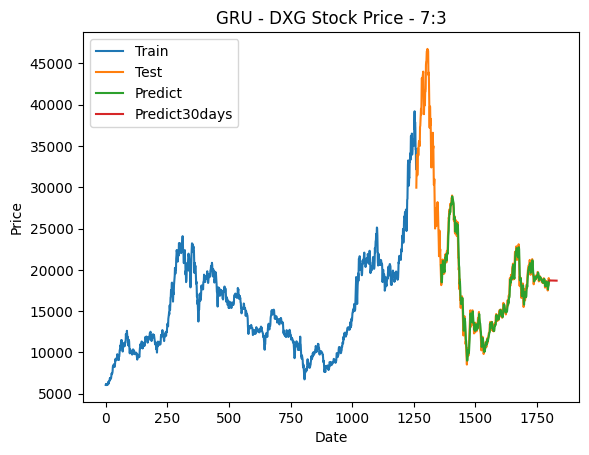

In [26]:
train_data_index_7_3 = pd.RangeIndex(start=0, stop=len(train_data_7_3), step=1)
plt.plot(train_data_index_7_3, scaler.inverse_transform(train_data_7_3), label='Train')

test_data_index_7_3 = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+len(test_data_7_3), step=1)
plt.plot(test_data_index_7_3, scaler.inverse_transform(test_data_7_3), label='Test')

predicted_test_index_7_3 = pd.RangeIndex(start=train_size_7_3+time_step, stop=train_size_7_3+len(y_pred_7_3)+time_step, step=1)
plt.plot(predicted_test_index_7_3, y_pred_7_3, label='Predicted Test')

future_index_7_3 = pd.RangeIndex(start=test_data_index_7_3[-1]+1, stop=test_data_index_7_3[-1]+31, step=1)
plt.plot(future_index_7_3, scaler.inverse_transform(lst_output_7_3), label='Predicted 30 days')

plt.title('GRU - DXG Stock Price - 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

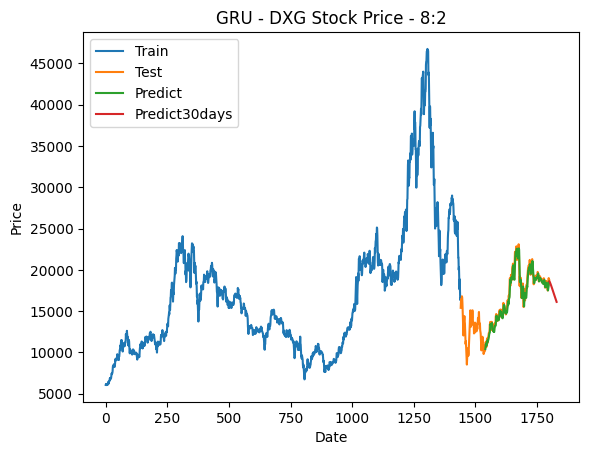

In [27]:
# Assume train_data_8_2, test_data_8_2, y_pred_8_2, lst_output_8_2, and train_size_8_2 are already defined

# Train data index
train_data_index_8_2 = pd.RangeIndex(start=0, stop=len(train_data_8_2), step=1)
plt.plot(train_data_index_8_2, scaler.inverse_transform(train_data_8_2), label='Train')

# Test data index
test_data_index_8_2 = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+len(test_data_8_2), step=1)
plt.plot(test_data_index_8_2, scaler.inverse_transform(test_data_8_2), label='Test')

# Predicted test data index
predicted_test_index_8_2 = pd.RangeIndex(start=train_size_8_2+time_step, stop=train_size_8_2+len(y_pred_8_2)+time_step, step=1)
plt.plot(predicted_test_index_8_2, y_pred_8_2, label='Predicted Test')

# Future predictions index
future_index_8_2 = pd.RangeIndex(start=test_data_index_8_2[-1]+1, stop=test_data_index_8_2[-1]+31, step=1)
plt.plot(future_index_8_2, scaler.inverse_transform(lst_output_8_2), label='Predicted 30 days')

# Plot details
plt.title('GRU - DXG Stock Price - 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()


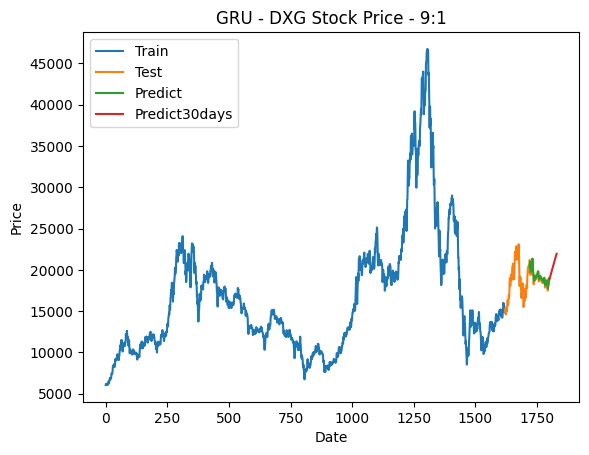

In [28]:
# Assume train_data_9_1, test_data_9_1, y_pred_9_1, lst_output_9_1, and train_size_9_1 are already defined

# Train data index
train_data_index_9_1 = pd.RangeIndex(start=0, stop=len(train_data_9_1), step=1)
plt.plot(train_data_index_9_1, scaler.inverse_transform(train_data_9_1), label='Train')

# Test data index
test_data_index_9_1 = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1 + len(test_data_9_1), step=1)
plt.plot(test_data_index_9_1, scaler.inverse_transform(test_data_9_1), label='Test')

# Predicted test data index
predicted_test_index_9_1 = pd.RangeIndex(start=train_size_9_1 + time_step, stop=train_size_9_1 + len(y_pred_9_1) + time_step, step=1)
plt.plot(predicted_test_index_9_1, y_pred_9_1, label='Predicted Test')

# Future predictions index
future_index_9_1 = pd.RangeIndex(start=test_data_index_9_1[-1] + 1, stop=test_data_index_9_1[-1] + 31, step=1)
plt.plot(future_index_9_1, scaler.inverse_transform(lst_output_9_1), label='Predicted 30 days')

# Plot details
plt.title('GRU - DXG Stock Price - 9:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()
